<a href="https://colab.research.google.com/github/anmolg1997/SpamDetector/blob/main/NLTK_Basic_Lexical_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
#print(alice.text)

In [ ]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

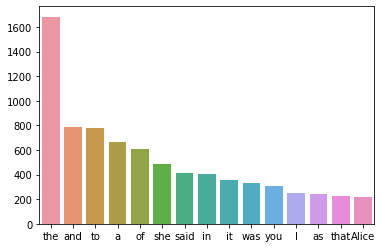

In [ ]:
alice_words = alice.text.split()
plot_word_frequency(alice_words, 15)

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
no_words = [word for word in alice_words if word not in stopwords.words('english')]

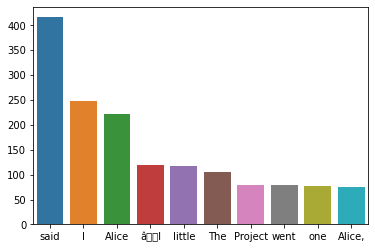

In [ ]:
plot_word_frequency(no_words)

In [ ]:
### Till now we have tokenized based on python split function

## **Tokenisation**
### 1. Word Tokenisation
Till now we have tokenized based on python split function.

In [ ]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God."
print(document)

At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God.


**Tokenising on spaces using python**

In [ ]:
print(document.split())

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself.', 'It', 'looks', 'like', 'religious', 'mania,', 'and', "he'll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God.']


**Tokenising using nltk word tokeniser**

In [ ]:
from nltk.tokenize import word_tokenize
words = word_tokenize(document)
print(words)

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself', '.', 'It', 'looks', 'like', 'religious', 'mania', ',', 'and', 'he', "'ll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God', '.']


NLTK's word tokeniser not only breaks on whitespaces but also breaks contraction words such as he'll into "he" and "'ll". On the other hand it doesn't break "o'clock" and treats it as a separate token.

### 2. Sentence Tokenisation


In [ ]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(document)
print(sentences)

["At nine o'clock I visited him myself.", "It looks like religious mania, and he'll soon think that he himself is God."]


### 3. Tweet  Tokenisation
The word tokeniser breaks the emoji '<3' into '<' and '3' which is something that we don't want. Emojis have their own significance in areas like sentiment analysis where a happy face and sad face can salone prove to be a really good predictor of the sentiment. Similarly, the hashtags are broken into two tokens. A hashtag is used for searching specific topics or photos in social media apps such as Instagram and facebook. So there, you want to use the hashtag as is.

Let's use the tweet tokeniser of nltk to tokenise this message.

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
print(word_tokenize(message))
print(tknzr.tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':', ')', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<', '3', '.', '#', 'bingewatching', '#', 'nothingtodo', '😎']
['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':)', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<3', '.', '#bingewatching', '#nothingtodo', '😎']


**As you can see, it handles all the emojis and the hashtags pretty well.**


### 4. Regexp  Tokenisation

In [ ]:
from nltk.tokenize import regexp_tokenize
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
pattern = "#[\w]+"

In [ ]:
regexp_tokenize(message, pattern)

['#bingewatching', '#nothingtodo']

## **Bag of words model**
#### **Steps** :
1. **Preprocessing** : Tokenize, Remove Stopwords, join to recreate string
2. **count Vectorize**  - to create bag of words model using count vectorize
3. **convert to dataframe** using - bow_model.toarray() as value & column names as vectorizer.get_feature_names()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

In [ ]:
def preprocess(doc):
  doc = doc.lower() # change sentence to lower case
  doc_words = word_tokenize(doc) # tokenize into words
  doc_words = [word for word in doc_words if word not in stopwords.words('english')] # remove stop words
  doc = " ".join(doc_words) # join words to make sentence
  return doc

In [ ]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [ ]:
#. Step1 : Preprocessing
documents = [preprocess(doc) for doc in documents ]
print(documents)

['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


In [ ]:
# Step2 : count vectorize
cv_instance = CountVectorizer()
bow_model = cv_instance.fit_transform(documents)
print(bow_model)  # returns the rown and column number of cells which have 1 as value & rest will be 0

  (0, 2)	1
  (0, 10)	1
  (0, 3)	1
  (0, 4)	1
  (1, 4)	1
  (1, 9)	1
  (1, 1)	1
  (1, 7)	1
  (1, 0)	1
  (2, 6)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1


In [ ]:
# Step3 : convert to dataframe
df_bow_model = pd.DataFrame(bow_model.toarray(), columns = cv_instance.get_feature_names())
print(df_bow_model)

   actors  depends  gangs  great  ...  releasing  success  wasseypur  week
0       0        0      1      1  ...          0        0          1     0
1       1        1      0      0  ...          0        1          0     0
2       0        0      0      0  ...          1        0          0     1

[3 rows x 12 columns]


### Let's create a bag of words model on the spam dataset.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
# load data
spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection.csv", names=["label", "message"])
spam.shape

(5574, 2)

In [ ]:
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
spam_doc = spam.iloc[:100,:]
spam_doc.shape

(100, 2)

In [ ]:
#step 1: Preprocessing
messages = spam_doc.message # extract the messages from the dataframe
messages = [msg for msg in messages]  # convert messages into list
messages = [preprocess(msg) for msg in messages] # preprocessing( tokenize, remove stopwords, join again)

In [ ]:
print(messages)

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough 

In [ ]:
# Step2 :  Bag of words model
cv_inst = CountVectorizer()
bow_model = cv_inst.fit_transform(messages)

In [ ]:
# Step3 : Convert to dataframe
df_bow_model = pd.DataFrame(bow_model.toarray(), columns = cv_inst.get_feature_names())

In [ ]:
df_bow_model.head()

,000,07732584351,0800,08000930705,08002986030,08452810075over18,09061209465,09061701461,09066364589,10,100,1000,10am,11,12,1500,150p,150pm,16,169,18,20,2005,21st,2nd,3aj,4403ldnw1a7rw18,450ppw,4txt,50,5000,5249,530,5we,6031,6days,81010,85069,87077,87121,...,wat,watching,watts,way,weak,week,weekend,well,wen,wet,whole,wif,win,wings,winner,wk,wkly,wo,wonderful,wont,word,words,work,world,worried,wow,wun,www,xuhui,xx,xxx,xxxmobilemovieclub,yeah,year,yes,yesterday,yo,yummy,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bow_model.sum().sum()

934

## **Stemming & Lemmatization**

**1. Stemming**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [ ]:
tokens = word_tokenize(text.lower())
print(tokens)

['very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pitted', 'its', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


In [ ]:
stemmer = PorterStemmer() # porter stemmer 
porter_stemmed = [stemmer.stem(token) for token in tokens]
print(porter_stemmed)
len(porter_stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [ ]:
stemmer = SnowballStemmer("english") # Snowball stemmer 
snowball_stemmed = [stemmer.stem(token) for token in tokens]
print(snowball_stemmed)
len(snowball_stemmed)

['veri', 'order', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'his', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [ ]:
df = pd.DataFrame({'token': tokens, 'porter_stemmed': porter_stemmed, 'snowball_stemmed': snowball_stemmed})
df.head()
#df.shape

,token,porter_stemmed,snowball_stemmed
0,very,veri,veri
1,orderly,orderli,order
2,and,and,and
3,methodical,method,method
4,he,he,he


In [ ]:
df[(df.token != df.porter_stemmed) | (df.token != df.snowball_stemmed)]

,token,porter_stemmed,snowball_stemmed
0,very,veri,veri
1,orderly,orderli,order
3,methodical,method,method
5,looked,look,look
18,ticking,tick,tick
20,sonorous,sonor,sonor
23,his,hi,his
24,flapped,flap,flap
25,newly,newli,newli
32,pitted,pit,pit


**2. Lemmatization**

In [ ]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [ ]:
# tokenise text
tokens = word_tokenize(text)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)

['Very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'a', 'though', 'it', 'pitted', 'it', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


### **Let's compare stemming and lemmatization**

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


In [ ]:
stemmer.stem('happily') 

'happili'

In [ ]:
import pandas as pd
df = pd.DataFrame(data={'token': tokens, 'stemmed': stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,Very,veri,Very
1,orderly,orderli,orderly
3,methodical,method,methodical
5,looked,look,looked
18,ticking,tick,ticking
20,sonorous,sonor,sonorous
23,his,hi,his
24,flapped,flap,flapped
25,newly,newli,newly
29,as,as,a


### **Let's compare the speed of both techniques**

In [ ]:
import requests
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
# print(alice.text)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("having")

'having'

In [ ]:
%%time
_ = [wordnet_lemmatizer.lemmatize(token, pos='n') for token in word_tokenize(alice.text)]

CPU times: user 330 ms, sys: 0 ns, total: 330 ms
Wall time: 333 ms


In [ ]:
%%time
_ = [stemmer.stem(token) for token in word_tokenize(alice.text)]

CPU times: user 792 ms, sys: 3.79 ms, total: 796 ms
Wall time: 797 ms


In [ ]:
words = ['I', 'Has', 'Yes', 'Was']
a = [w for w in words if w.lower() not in stopwords.words('english')]
print(a)

['Yes']


In [ ]:
a

['Yes']

### TF-IDF Model 
Here, TF  - token frequency
and IDF  - Inverse document frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
documents = ["Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.", "The success of a song depends on the music.", "There is a new movie releasing this week. The movie is fun to watch."]
print(documents)

['Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.', 'The success of a song depends on the music.', 'There is a new movie releasing this week. The movie is fun to watch.']


In [ ]:
def preprocess(document):
  doc = document.lower() #lowercase
  doc = word_tokenize(doc) #tokenize
  doc = [word for word in doc if word not in stopwords.words('english')] #removing stopwords
  doc = [PorterStemmer().stem(word) for word in doc] # Stemming
  doc = " ".join(doc)
  return doc



In [ ]:
documents = [preprocess(doc) for doc in documents]
print(documents)

['gang wasseypur great movi . wasseypur town bihar .', 'success song depend music .', 'new movi relea week . movi fun watch .']


In [ ]:
tfidf_inst = TfidfVectorizer()
bow_model_tfidf = tfidf_inst.fit_transform(documents)
print(bow_model_tfidf)

  (0, 0)	0.3414262179382391
  (0, 11)	0.3414262179382391
  (0, 5)	0.2596634391575384
  (0, 4)	0.3414262179382391
  (0, 12)	0.6828524358764781
  (0, 3)	0.3414262179382391
  (1, 6)	0.5
  (1, 1)	0.5
  (1, 9)	0.5
  (1, 10)	0.5
  (2, 13)	0.369772375024391
  (2, 2)	0.369772375024391
  (2, 14)	0.369772375024391
  (2, 8)	0.369772375024391
  (2, 7)	0.369772375024391
  (2, 5)	0.5624428445132056


In [ ]:
cv_inst = CountVectorizer()
bow_model_cv = cv_inst.fit_transform(documents)
print(bow_model_cv)

  (0, 3)	1
  (0, 12)	2
  (0, 4)	1
  (0, 5)	1
  (0, 11)	1
  (0, 0)	1
  (1, 10)	1
  (1, 9)	1
  (1, 1)	1
  (1, 6)	1
  (2, 5)	2
  (2, 7)	1
  (2, 8)	1
  (2, 14)	1
  (2, 2)	1
  (2, 13)	1


In [ ]:
tftdf_df = pd.DataFrame(bow_model_tfidf.toarray(), columns = tfidf_inst.get_feature_names())
tftdf_df.head()

,bihar,depend,fun,gang,great,movi,music,new,relea,song,success,town,wasseypur,watch,week
0,0.341426,0.0,0.000000,0.341426,0.341426,0.259663,0.0,0.000000,0.000000,0.0,0.0,0.341426,0.682852,0.000000,0.000000
1,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.369772,0.000000,0.000000,0.562443,0.0,0.369772,0.369772,0.0,0.0,0.000000,0.000000,0.369772,0.369772


In [ ]:
cv_df = pd.DataFrame(bow_model_cv.toarray(), columns = cv_inst.get_feature_names())
cv_df.head()

,bihar,depend,fun,gang,great,movi,music,new,relea,song,success,town,wasseypur,watch,week
0,1,0,0,1,1,1,0,0,0,0,0,1,2,0,0
1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,0,0,1,0,0,2,0,1,1,0,0,0,0,1,1
